# 1 <br>
Select a dataset with a continuous target variable. <br>
# 2 <br>
Be sure your data is prepared (no missing values, numeric datatypes) and split into samples. <br>
# 3 <br>
Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [1]:
import pandas as pd
import numpy as np
import wrangle2
import acquire
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score


import warnings
warnings.filterwarnings("ignore")

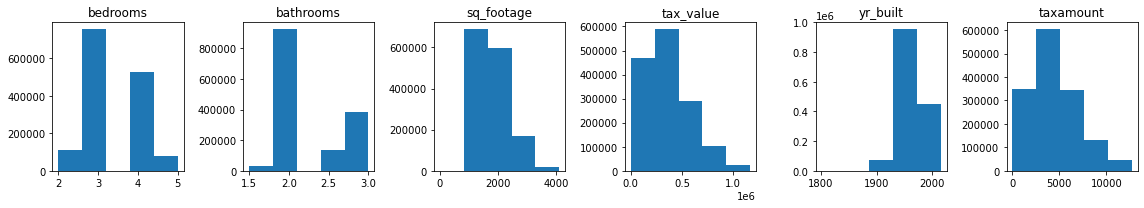

In [2]:
df = wrangle2.wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,sq_footage,tax_value,yr_built,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
23,3.0,2.5,1821.0,537949.0,2013.0,6173.72,6059.0


In [4]:
df.shape

(1475147, 7)

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sq_footage'}>],
       [<AxesSubplot:title={'center':'tax_value'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'taxamount'}>],
       [<AxesSubplot:title={'center':'fips'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

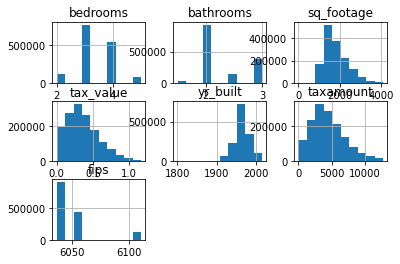

In [5]:
df.hist()

In [8]:
train, validate, test = wrangle2.split_data(df)
train.shape, validate.shape, test.shape

((826081, 7), (354036, 7), (295030, 7))

In [9]:
# Dropping the target from the other features
X_train = train.drop(columns='tax_value') 
X_validate = validate.drop(columns='tax_value')
X_test = test.drop(columns='tax_value')

# Creating a set containing the target
y_train = train.tax_value
y_validate = validate.tax_value
y_test = test.tax_value

In [10]:
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((826081, 6), (354036, 6), (295030, 6), (826081,), (354036,), (295030,))

In [11]:
X_validate.head()

,bedrooms,bathrooms,sq_footage,yr_built,taxamount,fips
1714095,4.0,3.0,2078.0,1982.0,4251.61,6037.0
1423003,3.0,3.0,1764.0,1998.0,3751.80,6037.0
1276735,3.0,2.0,1455.0,1955.0,1965.37,6037.0
819207,4.0,2.0,1722.0,1973.0,3133.54,6037.0
1373888,3.0,2.0,1473.0,1949.0,3651.35,6037.0


In [12]:
# Scale the predictive features, but not the target

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

In [13]:
# Convert the subsets into dataframes

X_train = pd.DataFrame(X_train, columns = ['bedrooms','bathrooms','sq_footage','yr_built','taxamount','fips'])
X_validate = pd.DataFrame(X_validate, columns = ['bedrooms','bathrooms','sq_footage','yr_built','taxamount','fips'])
X_test = pd.DataFrame(X_test, columns = ['bedrooms','bathrooms','sq_footage','yr_built','taxamount','fips'])

In [14]:
X_train.head()

,bedrooms,bathrooms,sq_footage,yr_built,taxamount,fips
0,-0.559143,-0.661833,-0.296500,-0.120649,0.141971,0.416549
1,-0.559143,-0.661833,-0.917147,-0.384196,-0.042563,0.416549
2,-0.559143,1.569854,-0.520831,1.355214,-0.473509,-0.611080
3,-0.559143,-0.661833,-0.199291,-0.120649,1.402232,-0.611080
4,-0.559143,-0.661833,-1.328420,0.406445,-0.477579,0.416549


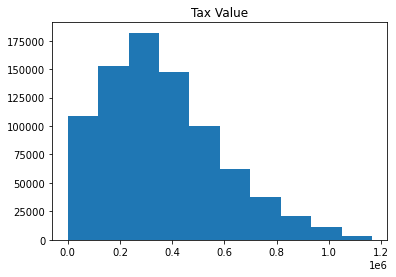

In [15]:
# Now we examine the target
# Identify the distribution

plt.hist(y_train)
plt.title('Tax Value')
plt.show()

In [16]:
# Convert the target into a dataframe

y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_train.head()

,tax_value
278237,405574.0
245132,366057.0
1369940,177000.0
1533627,681822.0
181419,251452.0


In [17]:
# Create a mean baseline

price_pred_mean = y_train.tax_value.mean()
y_train['price_pred_mean'] = price_pred_mean
y_validate['price_pred_mean'] = price_pred_mean

In [18]:
# Create a median baseline

price_pred_median = y_train.tax_value.median()
y_train['price_pred_median'] = price_pred_median
y_validate['price_pred_median'] = price_pred_median

In [19]:
# RMSE of price_pred_mean
rmse_train = mean_squared_error(y_train.tax_value,
                                y_train.price_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_mean) ** (1/2)

In [20]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  220060.48 
Validate/Out-of-Sample:  220140.91


In [21]:
# RMSE of price_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  222959.25 
Validate/Out-of-Sample:  222994.1


In [22]:
# Imported above, shown here so I know that this library is needed for this function
# from sklearn.metrics import explained_variance_score

In [23]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [24]:
# Create the metric_df as a blank dataframe
metric_df = pd.DataFrame()
# Make our first entry into the metric_df with median baseline
metric_df = make_metric_df(y_train.tax_value,
                           y_train.price_pred_median,
                           'median_baseline',
                          metric_df)

In [25]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.0


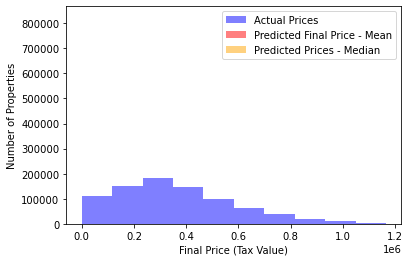

In [26]:
# Visualize actual vs predicted. 
plt.hist(y_train.tax_value, color='blue', alpha=.5, label="Actual Prices")
plt.hist(y_train.price_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Final Price - Mean")
plt.hist(y_train.price_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Prices - Median")
plt.xlabel("Final Price (Tax Value)")
plt.ylabel("Number of Properties")
plt.legend()
plt.show()

In [28]:
# Linear regression, OLS

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train.tax_value)
y_train['price_pred_lm'] = lm.predict(X_train)
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_lm) ** (1/2)
y_validate['price_pred_lm'] = lm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  52712.211426617345 
Validation/Out-of-Sample:  52827.96565767051


In [29]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.price_pred_lm)}, ignore_index=True)

In [30]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413


In [31]:
# Create the object
lars = LassoLars(alpha=1)

# Fit the model to train. 
# We must specify the column in y_train, 
# because we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['price_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_lars) ** (1/2)

# predict validate
y_validate['price_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  52778.971160774214 
Validation/Out-of-Sample:  52891.84932879514


In [32]:
metric_df = make_metric_df(y_validate.tax_value,
               y_validate.price_pred_lars,
               'lasso_alpha_1',
               metric_df)

metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413
2,lasso_alpha_1,52891.849329,0.942273


In [33]:
# This library is used for GLM, but was imported at the start of this notebook
# from sklearn.linear_model import TweedieRegressor

In [34]:
# Create the object
glm = TweedieRegressor(power=1, alpha=0)


# Fit the model to train. 
# We must specify the column in y_train, 
# becuase we  converted it to a dataframe from a series! 
glm.fit(X_train, y_train.tax_value)

# predict train
y_train['price_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_glm) ** (1/2)

# predict validate
y_validate['price_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  93319.72718086369 
Validation/Out-of-Sample:  93165.38464263831


In [35]:
make_metric_df(y_validate.tax_value,
               y_validate.price_pred_glm,
               'glm_poisson',
               metric_df)

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413
2,lasso_alpha_1,52891.849329,0.942273
3,glm_poisson,93165.384643,0.820895


In [36]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

In [37]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['price_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_lm2) ** (1/2)

# predict validate
y_validate['price_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  49614.4802098233 
Validation/Out-of-Sample:  49762.1036597909


In [38]:
metric_df = make_metric_df(y_validate.tax_value,
               y_validate.price_pred_lm2,
               'quadratic',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413
2,lasso_alpha_1,52891.849329,0.942273
3,quadratic,49762.103660,0.948903


# Evaluate <br>
Actual vs. Predicted Values

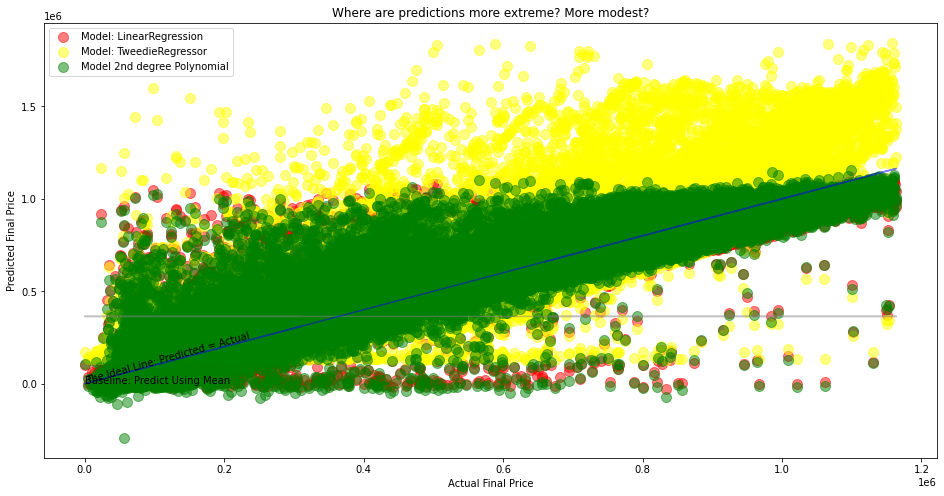

In [39]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.price_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.price_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.price_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.price_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Price")
plt.ylabel("Predicted Final Price")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

Residual Plot

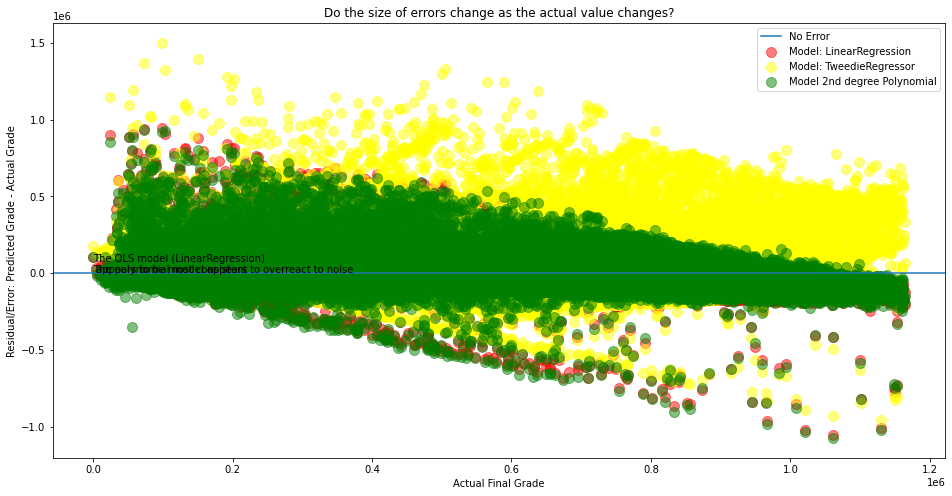

In [40]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate.price_pred_lm - y_validate.tax_value , 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.price_pred_glm - y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.price_pred_lm2 - y_validate.tax_value, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Residual/Error: Predicted Grade - Actual Grade")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

# Histograms <br>
actual vs predicted

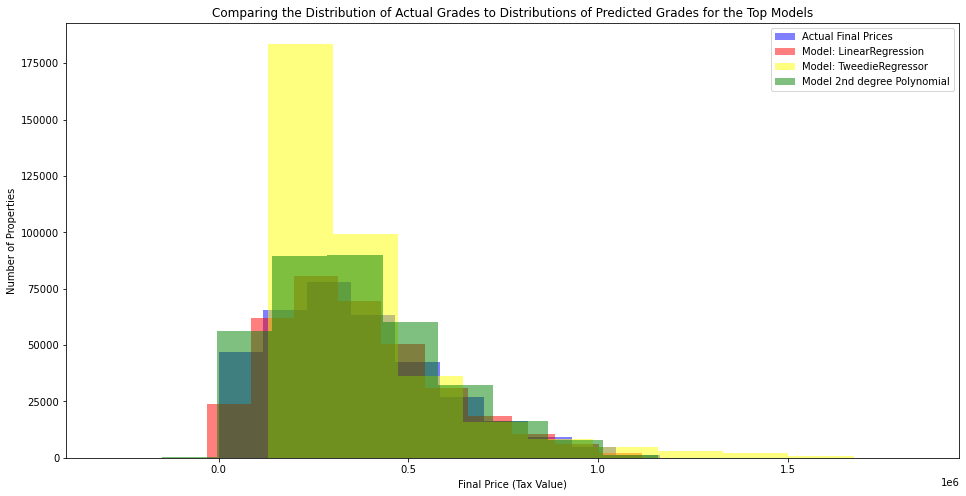

In [41]:
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual Final Prices")
plt.hist(y_validate.price_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.price_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.price_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Final Price (Tax Value)")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Grades to Distributions of Predicted Grades for the Top Models")
plt.legend()
plt.show()

In [42]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,222959.248065,0.000000
1,OLS Regressor,52827.965658,0.942413
2,lasso_alpha_1,52891.849329,0.942273
3,quadratic,49762.103660,0.948903


In [43]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['price_pred_lm'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.price_pred_lm) ** (1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  52599.31998890972


In [44]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['price_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.price_pred_lm2) ** (1/2)

# predict validate
y_validate['price_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.price_pred_lm2) ** 0.5

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  49614.4802098233 
Validation/Out-of-Sample:  49762.1036597909


In [46]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['price_pred_lm'] = lm2.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.price_pred_lm) ** (1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 28 is different from 6)